# Проект: Линейные модели в машинном обучении

## Разработка модели МО для молочного хозяйства "Вольный луг"

Фермер, владелец молочного хозяйства «Вольный луг», хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

«ЭкоФерма» готова предоставить подробные данные о своих коровах. 
<html>
    <hr>
</html>
   
**Цель:** Разработать модель машинного обучения, которая поможет управлять рисками и принимать объективное решение о покупке. Нужно создать две прогнозные модели для отбора бурёнок в поголовье:
   1. Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
   2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
   
С помощью модели нужно отобрать коров по двум критериям:
   - средний удой за год — не менее 6000 килограммов;
   - молоко должно быть вкусным.
   
**Этапы проекта:**
  1. Изучение общей информации
  2. Проверка данных на:
   - коррекность названия столбцов
   - корректность типов данных
   - пропуски
   - дубликаты
  3. Исследование данных
  4. Корреляционный анализ признаков
  5. Обучение модели линейной регрессии
  6. Обучение модели логической регрессии
  7. Итоговый вывод
  
<hr>
  
**Описание данных**

Три датасета:
 1. ferma_main.csv
 2. ferma_dad.csv
 3. cow_buy.csv

Файл **ferma_main.csv** содержит данные о стаде фермера на текущий момент. 
 - id — уникальный идентификатор коровы.
 - Удой, кг — масса молока, которую корова даёт в год (в килограммах).
 - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
 - Сырой протеин, г — содержание сырого протеина в корме (в граммах).
 - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
 - Порода — порода коровы.
 - Тип пастбища — ландшафт лугов, на которых паслась корова.
 - порода папы_быка — порода папы коровы.
 - Жирность,% — содержание жиров в молоке (в процентах).
 - Белок,% — содержание белков в молоке (в процентах).
 - Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
 - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
 
Признаки в датасете **ferma_main.csv** можно разделить на группы.
 - Характеристики коровы: id, Порода, порода папы_быка, Возраст.
 - Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
 - Характеристика пастбища: Тип пастбища.
 - Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

Файл **ferma_dad.csv** хранит имя папы каждой коровы в стаде фермера.
 - id — уникальный идентификатор коровы.
 - Имя Папы — имя папы коровы.
 
Файл **cow_buy.csv** — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.
 - Порода — порода коровы.
 - Тип пастбища — ландшафт лугов, на которых паслась корова.
 - порода папы_быка — порода папы коровы.
 - Имя_папы — имя папы коровы.
 - Текущая_жирность,% — содержание жиров в молоке (в процентах).
 - Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
 - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

У датасета **cow_buy.csv** несколько особенностей.
1. Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
2. Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
4. Отсутствуют признаки Удой, кг и Вкус молока.

**Импорт библиотек**

In [217]:
import pandas as pd
import numpy as np
import scipy as scipy

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, recall_score, precision_score, r2_score,\
accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## Загрузка данных

### Открытие файлов

In [218]:
herd_info = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal = ',')
hi =  pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal = ',')
dad_name_info = pd.read_csv('/datasets/ferma_dad.csv', sep = ';', decimal = ',')
cow_info = pd.read_csv('/datasets/cow_buy.csv', sep = ';', decimal = ',')

### Анализ таблиц

#### Таблица с информацией о стаде

In [219]:
herd_info.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


##### Общая информация

In [220]:
herd_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [221]:
herd_info.describe().T

,count,mean,std,min,25%,50%,75%,max
id,634.0,317.460568,183.096982,1.000,159.250,317.500,475.750,629.000
"Удой, кг",634.0,6187.025237,1638.401021,5204.000,5751.750,6130.500,6501.000,45616.000
ЭКЕ (Энергетическая кормовая единица),634.0,14.542744,1.301301,10.900,13.500,14.700,15.600,16.800
"Сырой протеин, г",634.0,1922.682965,182.392548,1660.000,1772.250,1880.500,2058.750,2349.000
СПО (Сахаро-протеиновое соотношение),634.0,0.912855,0.032209,0.840,0.890,0.930,0.940,0.960
"Жирность,%",634.0,3.603943,0.168020,2.990,3.590,3.650,3.720,3.750
"Белок,%",634.0,3.075666,0.002540,3.069,3.074,3.076,3.077,3.085


##### Построение графиков для каждого столбца

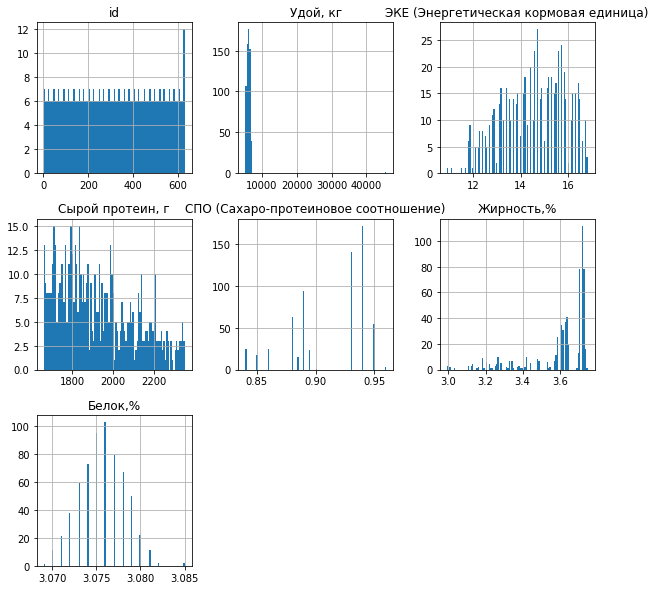

In [222]:
herd_info.hist(bins = 100, figsize = (10, 10));

**Вывод**

1. В таблице содержится 634 записи и 12 столбцов.
2. Пропусков не обнаружено. 
3. Названия столбцов следует перевести в корректный для стандарта snake_case вид. 
4. Несоответствие типа данных обнаружено в следующих столбцах:

- Перевести категориальные признаки в числовые:
 - Возраст
 - Вкус молока
 - Порода
 - Тип пастбища
 - Порода папы быка
 
5. Из графиков видно, что столбцы имеют нормальное распределение данных, кроме признака Удой, имеющего пик значений близко к нулю и Жирность, у которого пик значений сильно ушел вправо.

#### Таблица с именами пап коров

In [223]:
dad_name_info.head(10)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


#####  Общая информация

In [224]:
dad_name_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


**Вывод**
1. Таблица состоит из 629 строк и 2 столбцов
2. Пропусков не обнаружено
3. Типы данных соответствуют содержимому
4. Заголовки следует изменить под "snake case"
5. Перевести категориальный признак в числовой - имя папы

#### Таблица с данными "ЭкоФермы"

In [225]:
cow_info.head(10)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


##### Общая информация

In [226]:
cow_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


**Вывод**

1. Таблица состоит из 20 записей и 7 столбцов
2. Пропусков не обнаружено
3. Перевести заголовки в "snake_case"
4. Несоответствие типов данных содержажимся данным прослеживается у столбцов:

- Перевести категориальные признаки в числовые:
 - Возраст
 - Порода
 - Тип пастбища
 - порода папы быка
 - Имя папы

5. Добавить колонки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) и увеличить значения каждого из этих параметров на 5%.

##  Предобработка данных

### Изменение заголовков таблиц 

#### Таблица herd_info

In [227]:
herd_info = herd_info.rename(columns ={'Удой, кг':'milk_yield',
                                       'ЭКЕ (Энергетическая кормовая единица)':'energy_feed_unit',
                                       'Сырой протеин, г':'raw_protein',
                                       'СПО (Сахаро-протеиновое соотношение)':'sugar_protein_ratio',
                                       'Порода':'breed',
                                       'Тип пастбища':'type_of_pasture',
                                       'порода папы_быка':'breed_of_papa_bull',
                                       'Жирность,%':'fat_content',
                                       'Белок,%':'protein',
                                       'Вкус молока':'teste_of_milk',
                                       'Возраст':'age'
                                      })
herd_info.columns

Index(['id', 'milk_yield', 'energy_feed_unit', 'raw_protein',
       'sugar_protein_ratio', 'breed', 'type_of_pasture', 'breed_of_papa_bull',
       'fat_content', 'protein', 'teste_of_milk', 'age'],
      dtype='object')

#### Таблица dad_name_info

In [228]:
dad_name_info = dad_name_info.rename(columns = {'Имя Папы':"dad_name"})
dad_name_info.columns

Index(['id', 'dad_name'], dtype='object')

#### Таблица cow_info

In [229]:
cow_info = cow_info.rename(columns = {'Порода':'breed',
                                      'Тип пастбища':'type_of_pasture',
                                      'порода папы_быка':'breed_of_papa_bull',
                                      'Имя_папы':"dad_name",
                                      'Текущая_жирность,%':'fat_content',
                                      'Текущий_уровень_белок,%':'protein',
                                      'Возраст':'age'
                                     })
cow_info.columns

Index(['breed', 'type_of_pasture', 'breed_of_papa_bull', 'dad_name',
       'fat_content', 'protein', 'age'],
      dtype='object')

### Подсчет числа пропусков

In [230]:
print(herd_info.isna().sum(), '\n')
print(dad_name_info.isna().sum(), '\n')
print(cow_info.isna().sum())

id                     0
milk_yield             0
energy_feed_unit       0
raw_protein            0
sugar_protein_ratio    0
breed                  0
type_of_pasture        0
breed_of_papa_bull     0
fat_content            0
protein                0
teste_of_milk          0
age                    0
dtype: int64 

id          0
dad_name    0
dtype: int64 

breed                 0
type_of_pasture       0
breed_of_papa_bull    0
dad_name              0
fat_content           0
protein               0
age                   0
dtype: int64


### Поиск дубликатов

#### Явные дубликаты

In [231]:
print(herd_info.duplicated().sum(), '\n')
print(dad_name_info.duplicated().sum(), '\n')
print(cow_info.duplicated().sum())

5 

0 

4


In [232]:
herd_info = herd_info.drop_duplicates().reset_index(drop = True)
herd_info.duplicated().sum()

0

#### Неявные дубликаты

Рассматривать будем следующие столбцы:

- herd_info:
 - breed
 - type_of_pasture
 - breed_of_papa_bull

- dad_name_info:
 - dad_name

- cow_info:
 - breed
 - type_of_pasture
 - breed_of_papa_bull
 - dad_name

##### Таблица herd_info

In [233]:
herd_info['breed'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [234]:
herd_info['type_of_pasture'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [235]:
herd_info['type_of_pasture'] = herd_info['type_of_pasture'].replace('Равнинные', 'Равнинное')
herd_info['type_of_pasture'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [236]:
herd_info['breed_of_papa_bull'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [237]:
herd_info['breed_of_papa_bull'] = herd_info['breed_of_papa_bull'].replace('Айдиалл', 'Айдиал')
herd_info['breed_of_papa_bull'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

##### Таблица dad_name_info

In [238]:
dad_name_info['dad_name'].sort_values().unique()

array(['Барин', 'Буйный', 'Геркулес', 'Соловчик'], dtype=object)

##### Таблица cow_info

In [239]:
cow_info['breed'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [240]:
cow_info['type_of_pasture'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [241]:
cow_info['type_of_pasture'] = cow_info['type_of_pasture'].replace('холмистое', 'Холмистое')
cow_info['type_of_pasture'] = cow_info['type_of_pasture'].replace('равнинное', 'Равнинное')
cow_info['type_of_pasture'].unique()

array(['Холмистое', 'Равнинное'], dtype=object)

In [242]:
cow_info['breed_of_papa_bull'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [243]:
cow_info['dad_name'].sort_values().unique()

array(['Барин', 'Буйный', 'Геркулес', 'Соловчик'], dtype=object)

**Вывод**

 - В данном разделе были исправленны заголовки - переведены на английский и в нижний регистр. 
 - Таблицы проверены на наличие пропусков - пропуски также не обнаружены. 
 - Проведена проверка на наличие дубликатов - явные дубликаты имелись в таблицах "herd_info" и "cow_info"; обнаружены и исправлены неявные дубликаты в текстовых столбцах.

## Исследовательский анализ данных

### Категориальные признаки

К категориальным признакам относятся breed, type_of_pasture, breed_of_papa_bull, teste_of_milk, age;

#### Соотношение пород коров

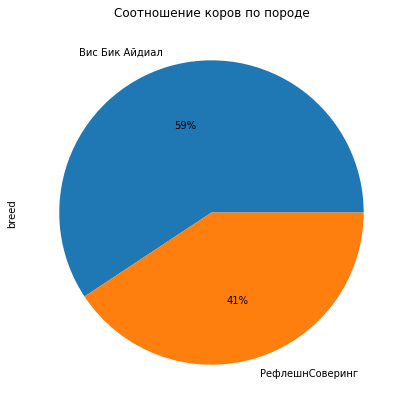

In [244]:
herd_info['breed'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'Соотношение коров по породе'
);

<div class="alert alert-warning">
<b>Комментарий 👉</b>



Специалисты по визуализации утверждают, что наш мозг?/глаз? **очень плохо "различает различия"** между "примерно одинаковыми" кусочками pie-диаграммы. Ну и соответственно рекомендуют использовать столбиковые?/столбцовые? диаграммы. У тебя конечно цифрами "кусочки" подписаны, но тем не менее мнение такое в среде специалистов по визуализации существует.

Я ни в коем случае не против pie-диаграмм! Я просто призываю помнить об их обманчивой сущности )))

p.s. по факту приёма проекта я пришлю тебе набор книг в котором среди прочих будут и книги по визуализации (в одной из них вопрос обманчивой сущности pie-диаграмм будет раскрыт подробно).</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <p>
    <font color='4682B4'>Мне кажется, что круговая диаграмма хорошо подходит для наглядного сравнения только двух категорий, а для большего количества категорий лучше использовать столбиковую диаграмму. Будет интересно почитать про pie-диаграммы поподбробнее. </font>
</div>

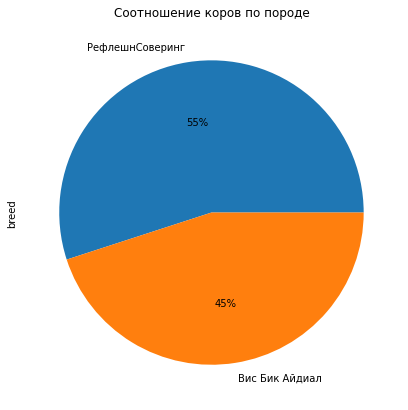

In [245]:
cow_info['breed'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'Соотношение коров по породе'
);

#### Соотношение типа пастбищ

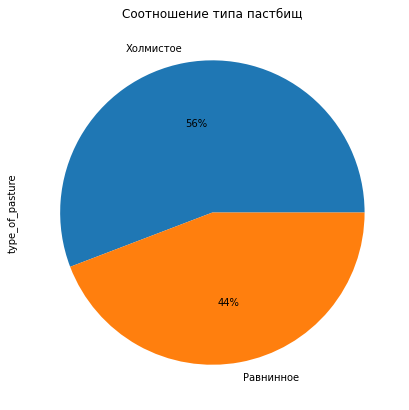

In [246]:
herd_info['type_of_pasture'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'Соотношение типа пастбищ'
);

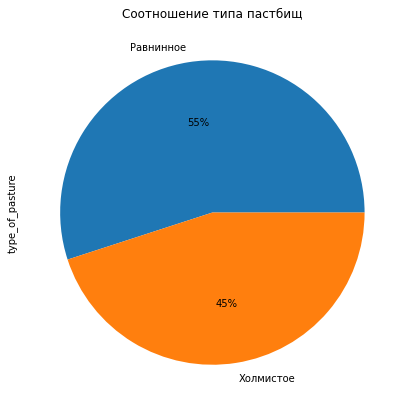

In [247]:
cow_info['type_of_pasture'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'Соотношение типа пастбищ'
);

#### Соотношение итогового вкуса молока

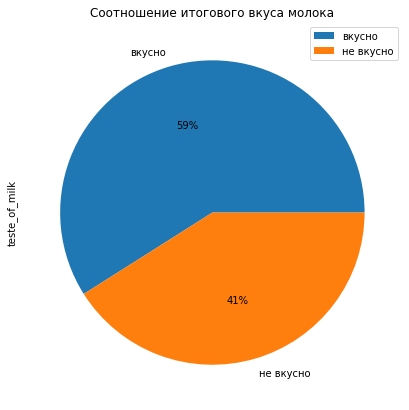

In [248]:
herd_info['teste_of_milk'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'Соотношение итогового вкуса молока',
    legend = True
);

<div class="alert alert-warning">
<b>Комментарий 👉</b>



Наблюдаешь ли дисбаланс в целевой переменной (таргете)? Если наблюдаешь, то как этот факт отражается на выборке метрики для моделей МО?
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <p>
    <font color='4682B4'>Предпологаю, что такой дисбаланс может повлиять на точность метрик, оценивающих качество работы модели. Также меньше примеров в определенном классе дает меньше данных для обучения, что делает модель менее надежной.</font>
</div>

#### Соотношение возраста коров

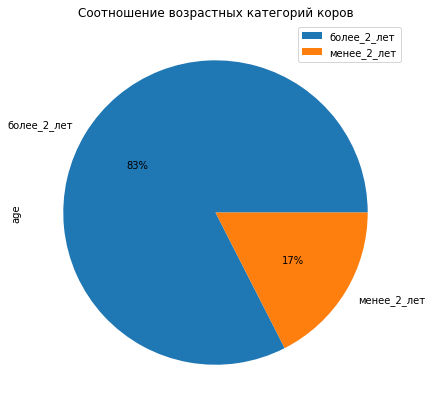

In [249]:
herd_info['age'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'Соотношение возрастных категорий коров',
    legend = True
);

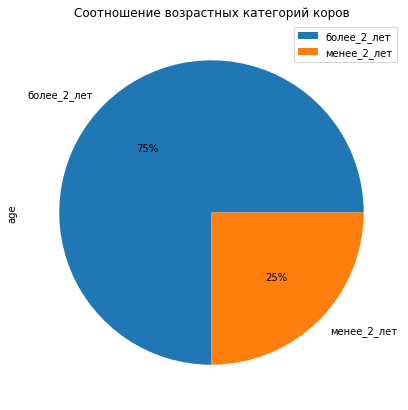

In [250]:
cow_info['age'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'Соотношение возрастных категорий коров',
    legend = True
);

#### Соотношение пород быков

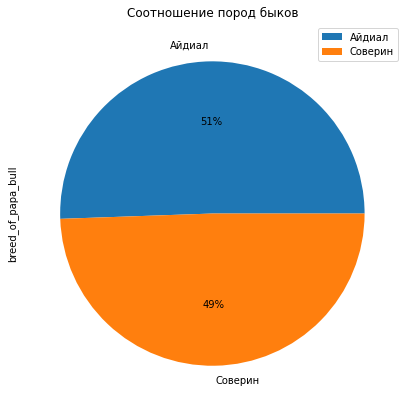

In [251]:
herd_info['breed_of_papa_bull'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'Соотношение пород быков',
    legend = True
);

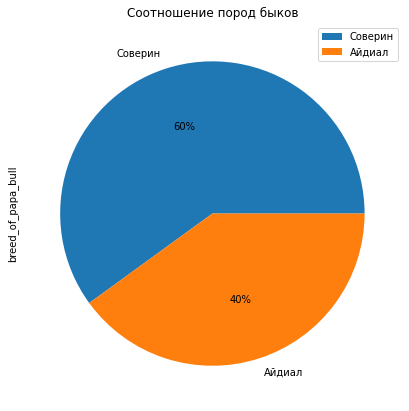

In [252]:
cow_info['breed_of_papa_bull'].value_counts().plot(
    kind = 'pie',
    figsize = (7, 7),
    autopct = '%0.f%%',
    title = 'Соотношение пород быков',
    legend = True
);

### Количественные признаки

К количесвтенным  milk_yield, energy_feed_unit, raw_protein, sugar_protein_ratio, fat_content, protein; построим гистограммы распределения и ящики с усами. Перед поиском выбросов стоит построить таблицу коллинеарности и посмотреть, какие признаки влияют на Удой.

In [253]:
herd_info.corr(method = 'spearman')

,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,fat_content,protein
id,1.000000,-0.007546,-0.017754,-0.032749,-0.021522,0.042483,0.003334
milk_yield,-0.007546,1.000000,0.756791,0.431229,0.786367,0.681329,-0.005279
energy_feed_unit,-0.017754,0.756791,1.000000,0.387436,0.740029,0.688273,-0.013803
raw_protein,-0.032749,0.431229,0.387436,1.000000,0.484731,0.395286,0.228104
sugar_protein_ratio,-0.021522,0.786367,0.740029,0.484731,1.000000,0.699606,0.109788
fat_content,0.042483,0.681329,0.688273,0.395286,0.699606,1.000000,0.042541
protein,0.003334,-0.005279,-0.013803,0.228104,0.109788,0.042541,1.000000


Сильное влияение на целевой признак имеют ЭКЕ и СПО, среднее Жирность. В данных признаках выбросы убирать не стоит.

#### Удой

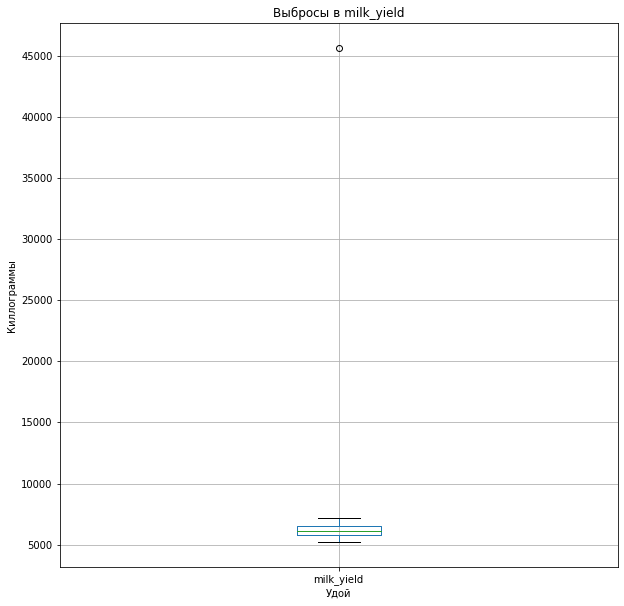

In [254]:
herd_info.boxplot(column = 'milk_yield', figsize = (10, 10))
plt.title('Выбросы в milk_yield')
plt.xlabel('Удой')
plt.ylabel('Киллограммы');

Распределение данных выглядит нормальным при ограничении с 5000 по 8000 кг. У столбца "milk_yield" наблюдается единственный выброс в районе 45000 кг. Посмотрим, много ли таких значений. 

In [255]:
herd_info['milk_yield'].sort_values(ascending = False).head()

16     45616
70      7222
135     7207
296     7201
294     7197
Name: milk_yield, dtype: int64

Видимо ошибка при внесении данных. Это единичный случай, поэтому его удаление не сильно повлияет на общую картину.

In [256]:
herd_info = herd_info.query('milk_yield < 45000')
herd_info['milk_yield'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: milk_yield, dtype: float64

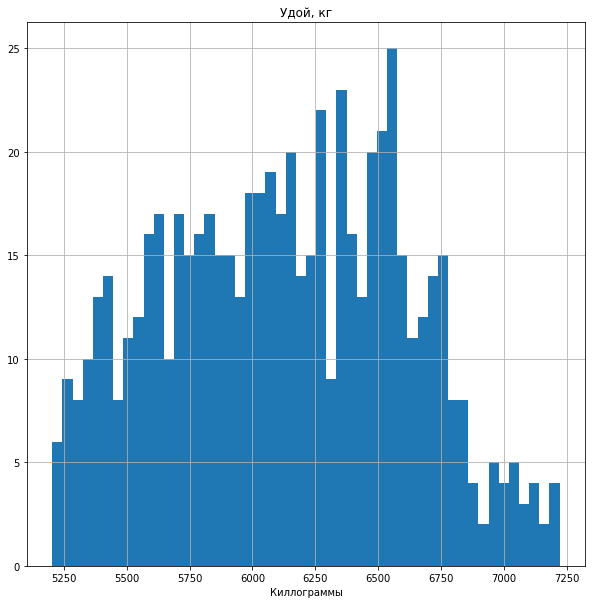

In [257]:
herd_info['milk_yield'].hist(bins = 50, figsize = (10, 10))
plt.title('Удой, кг')
plt.xlabel('Киллограммы');

Также рассмотрим средний показатель.

Из описания столбца после удаления выбросов можно выделить среднее значение удоя в кг. - 6125.97

#### Энергетическая кормовая единица

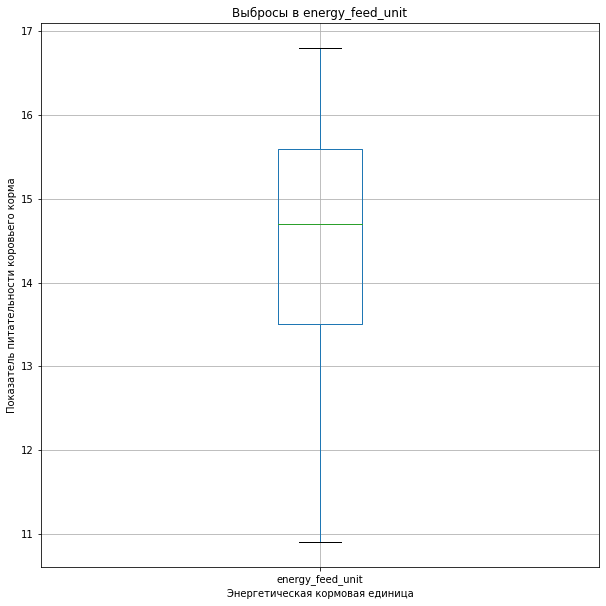

In [258]:
herd_info.boxplot(column = 'energy_feed_unit', figsize = (10, 10))
plt.title('Выбросы в energy_feed_unit')
plt.xlabel('Энергетическая кормовая единица')
plt.ylabel('Показатель питательности коровьего корма');

Выбросов не наблюдается, распределение тоже выглядит нормальным за исключением пробела между 11 и 12.

<div class="alert alert-warning">
<b>Комментарий 👉</b>

**распределение тоже выглядит нормальным** - нормальность распределения данных проверяешь "на глаз", но это несколько некорректно - есть вероятность ошибки (понятно что не в нашем случае - тут всё ясно ... но вот в случае распределения похожего на Гауссиану). Что надо сделать чтобы строго подтвердить или опровергнуть нормальность распределения случайной величины?

Вот полезная статья на эту тему: https://questu.ru/articles/197465/?ysclid=lqne65uoj8436661539
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <p>
    <font color='4682B4'>Прочла статью и сделаю вывод, что в данном случае распределение данных не нормальное. При нормальном значение среднего 14.55 и медианы были бы на одном уровне. Спасибо за замечание!</font>
</div>

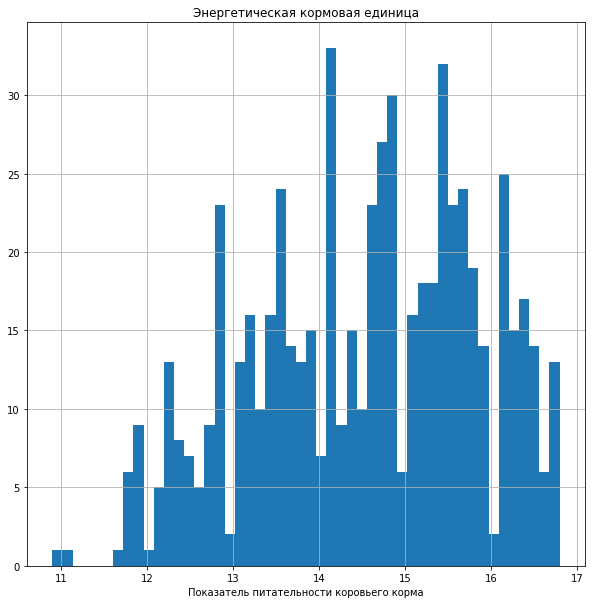

In [259]:
herd_info['energy_feed_unit'].hist(bins = 50, figsize = (10, 10))
plt.title('Энергетическая кормовая единица')
plt.xlabel('Показатель питательности коровьего корма');

In [260]:
print(f'Средний показатель энергетической кормовой ценности: {herd_info["energy_feed_unit"].mean():.2f}')

Средний показатель энергетической кормовой ценности: 14.55


In [261]:
herd_info['energy_feed_unit'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: energy_feed_unit, dtype: float64

#### Сырой протеин

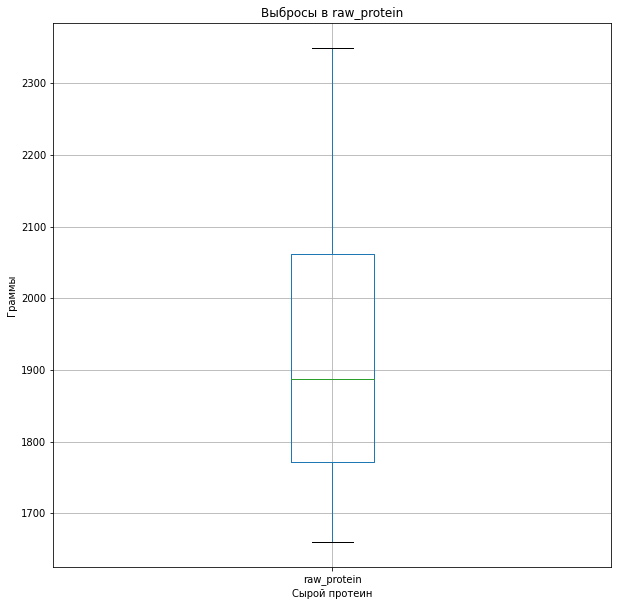

In [262]:
herd_info.boxplot(column = 'raw_protein', figsize = (10, 10))
plt.title('Выбросы в raw_protein')
plt.xlabel('Сырой протеин')
plt.ylabel('Граммы');

In [263]:
herd_info['raw_protein'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: raw_protein, dtype: float64

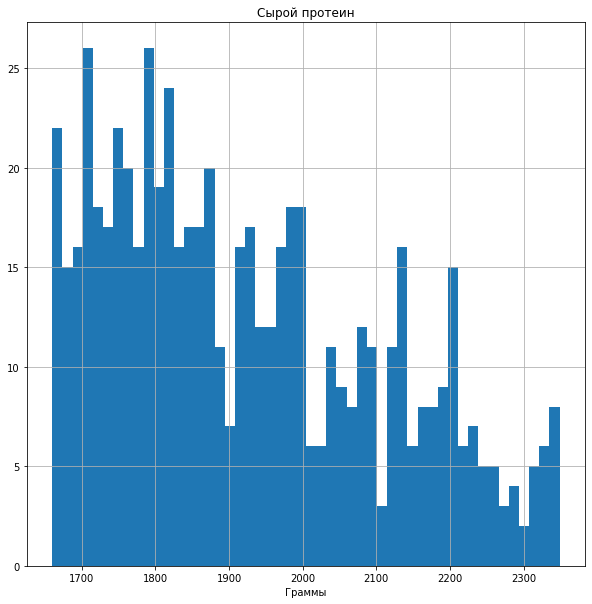

In [264]:
herd_info['raw_protein'].hist(bins = 50, figsize = (10, 10))
plt.title('Сырой протеин')
plt.xlabel('Граммы');

In [265]:
print(f'Средний показатель сырого протеина(г.): {herd_info["raw_protein"].mean():.2f}')

Средний показатель сырого протеина(г.): 1923.76


#### Сахаро-протеиновое соотношение

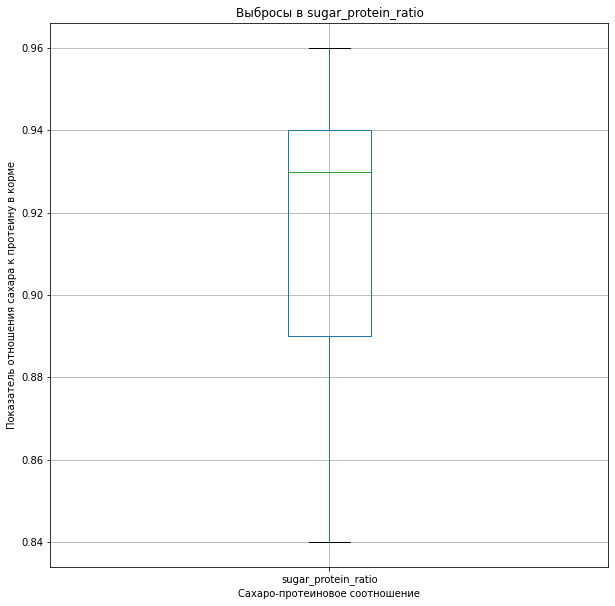

In [266]:
herd_info.boxplot(column = 'sugar_protein_ratio', figsize = (10, 10))
plt.title('Выбросы в sugar_protein_ratio')
plt.xlabel('Сахаро-протеиновое соотношение')
plt.ylabel('Показатель отношения сахара к протеину в корме');

In [267]:
herd_info['sugar_protein_ratio'].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: sugar_protein_ratio, dtype: float64

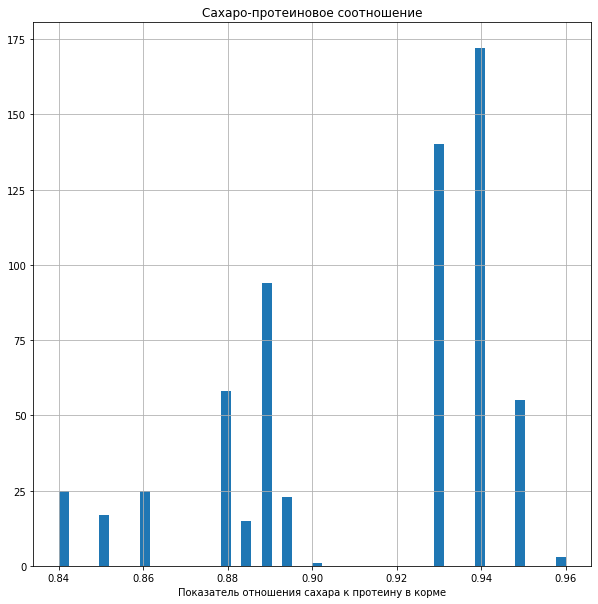

In [268]:
herd_info['sugar_protein_ratio'].hist(bins = 50, figsize = (10, 10))
plt.title('Сахаро-протеиновое соотношение')
plt.xlabel('Показатель отношения сахара к протеину в корме');

In [269]:
print(f'Средний показатель отношения сахара к протеину в корме: {herd_info["sugar_protein_ratio"].mean():.2f}')

Средний показатель отношения сахара к протеину в корме: 0.91


#### Жирность, %

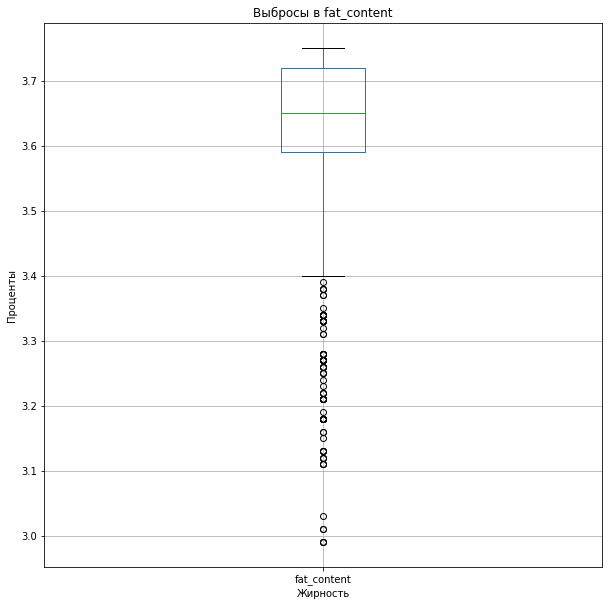

In [270]:
herd_info.boxplot(column = 'fat_content', figsize = (10, 10))
plt.title('Выбросы в fat_content')
plt.xlabel('Жирность')
plt.ylabel('Проценты');

Имеются выбросы до значения в 3.4%. Посмотрим их общее количество.

In [271]:
min_fat = herd_info.query('fat_content < 3.4').count()
min_fat['fat_content']

86

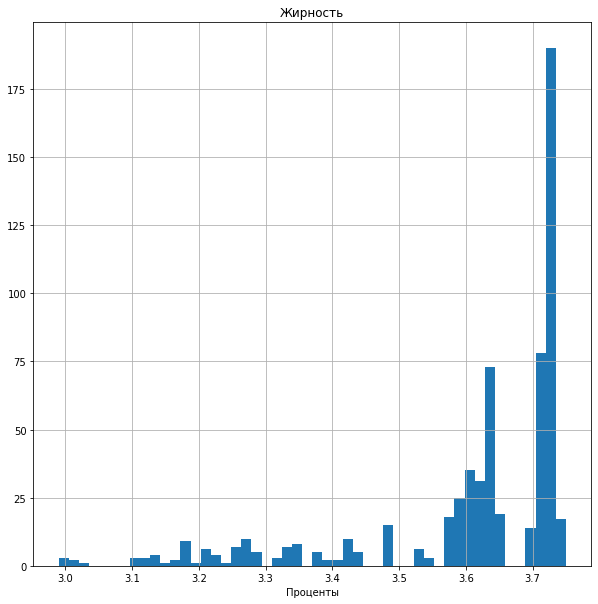

In [272]:
herd_info['fat_content'].hist(bins = 50, figsize = (10, 10))
plt.title('Жирность')
plt.xlabel('Проценты');

In [273]:
print(f'Средний показатель жирности: {herd_info["fat_content"].mean():.2f}')

Средний показатель жирности: 3.60


#### Белок, %

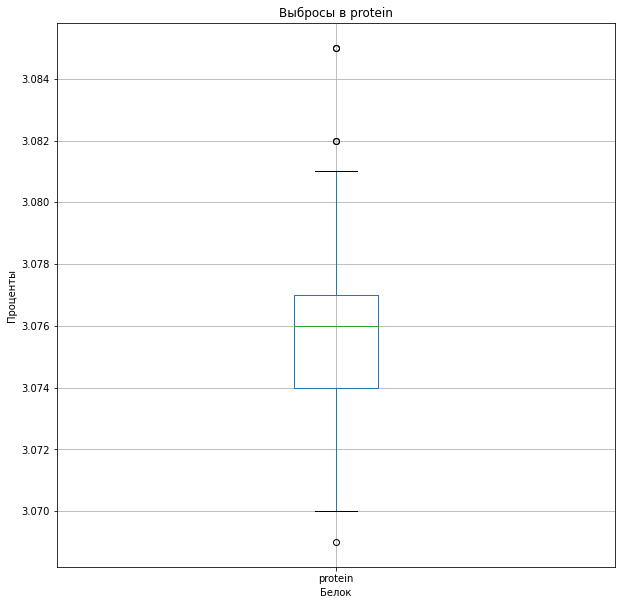

In [274]:
herd_info.boxplot(column = 'protein', figsize = (10, 10))
plt.title('Выбросы в protein')
plt.xlabel('Белок')
plt.ylabel('Проценты');

Наблюдаются выбросы на значениях перед минимумом и после максимального. Посмотрим количество выбросов и как их удаление повлияет на данные. 

In [275]:
min_protein = herd_info.query('protein < 3.070').count()
max_protein = herd_info.query('protein > 3.081').count()
min_protein['protein'] + max_protein['protein']

5

Значений не так много, поэтому их можно удалить, т.к. это не сильно исказит общую картину.

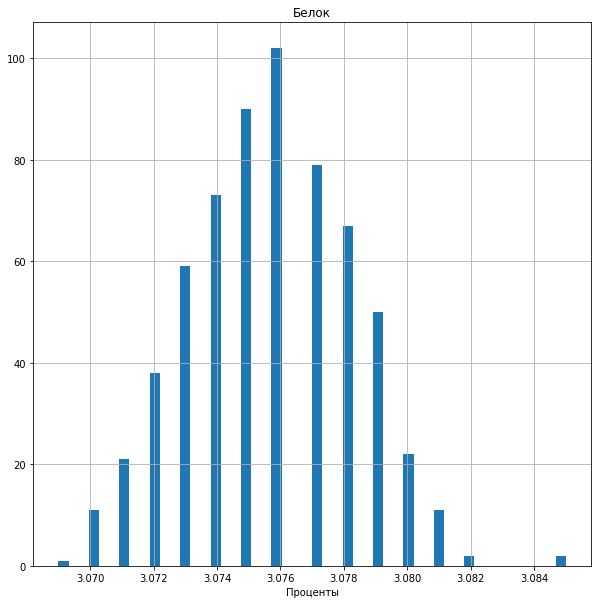

In [276]:
herd_info['protein'].hist(bins = 50, figsize = (10, 10))
plt.title('Белок')
plt.xlabel('Проценты');

In [277]:
print(f'Средний показатель белка: {herd_info["protein"].mean():.2f}')

Средний показатель белка: 3.08


In [278]:
herd_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   628 non-null    int64  
 1   milk_yield           628 non-null    int64  
 2   energy_feed_unit     628 non-null    float64
 3   raw_protein          628 non-null    int64  
 4   sugar_protein_ratio  628 non-null    float64
 5   breed                628 non-null    object 
 6   type_of_pasture      628 non-null    object 
 7   breed_of_papa_bull   628 non-null    object 
 8   fat_content          628 non-null    float64
 9   protein              628 non-null    float64
 10  teste_of_milk        628 non-null    object 
 11  age                  628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.8+ KB


### Добавление столбцов

Добавим колонки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) в таблицу **cow_info** и увеличим значения каждого из этих параметров на 5%.

In [279]:
cow_info['energy_feed_unit'] = herd_info['energy_feed_unit'] + herd_info['energy_feed_unit'] * 0.05
cow_info['raw_protein'] = herd_info['raw_protein'] + herd_info['raw_protein'] * 0.05
cow_info['sugar_protein_ratio'] = herd_info['sugar_protein_ratio'] + herd_info['sugar_protein_ratio'] * 0.05

In [280]:
cow_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   breed                20 non-null     object 
 1   type_of_pasture      20 non-null     object 
 2   breed_of_papa_bull   20 non-null     object 
 3   dad_name             20 non-null     object 
 4   fat_content          20 non-null     float64
 5   protein              20 non-null     float64
 6   age                  20 non-null     object 
 7   energy_feed_unit     19 non-null     float64
 8   raw_protein          19 non-null     float64
 9   sugar_protein_ratio  19 non-null     float64
dtypes: float64(5), object(5)
memory usage: 1.7+ KB


После добавления появилась строка с пропусками в новых столбцах. Удалять из этой таблицы строки нельзя, поэтому заполним пропуск медианой, т.к. она более устойчива к разбросу значений.

In [281]:
cow_info['energy_feed_unit'] = cow_info['energy_feed_unit'].fillna(cow_info['energy_feed_unit'].median())
cow_info['raw_protein'] = cow_info['raw_protein'].fillna(cow_info['raw_protein'].median())
cow_info['sugar_protein_ratio'] = cow_info['sugar_protein_ratio'].fillna(cow_info['sugar_protein_ratio'].median())
cow_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   breed                20 non-null     object 
 1   type_of_pasture      20 non-null     object 
 2   breed_of_papa_bull   20 non-null     object 
 3   dad_name             20 non-null     object 
 4   fat_content          20 non-null     float64
 5   protein              20 non-null     float64
 6   age                  20 non-null     object 
 7   energy_feed_unit     20 non-null     float64
 8   raw_protein          20 non-null     float64
 9   sugar_protein_ratio  20 non-null     float64
dtypes: float64(5), object(5)
memory usage: 1.7+ KB


**Вывод**

По количественному соотношению данных категориальных признаков выявлено следующее:
 - Преобладающая порода - Вис Бик Айдиал
 - Тип пастбища - Холмистое
 - Вкус молока - вкусное
 - Возраст коров - больше 2 лет
 - Порода папы быка - Айдиал
 
По анализу количественных признаков:
- Построены столбчатые графики для наглядного анализа распределения данных
- Построены диаграммы ящик с усами для определения выбросов
- Выбросы обнаружены и удалены у следующих столбцов - milk_yield, fat_content, protein
- Установлены средние показатели у каждого признака 

После обработки данных в таблицу **cow_info** добавлены признаки ЭКЕ, СПО и Сырой протеин, увеличенные на 5%

## Корреляционный анализ

In [282]:
herd_info_query = herd_info.drop('id', axis = 1)

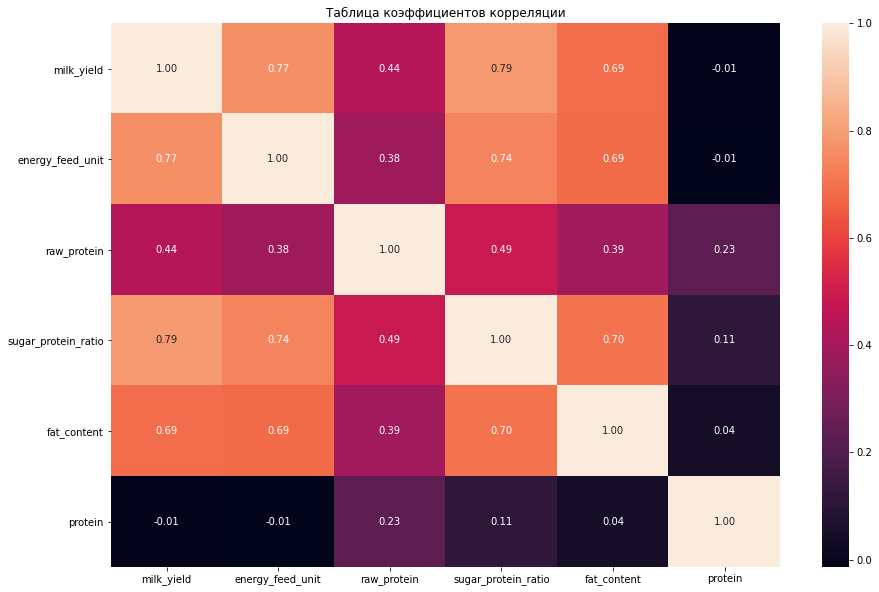

In [283]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(herd_info_query.corr(method = 'spearman'), annot = True, fmt = '.2f')
plt.title('Таблица коэффициентов корреляции');

**Количесвтенные**  energy_feed_unit, raw_protein, sugar_protein_ratio, fat_content, protein; 

**Категориальные** breed, type_of_pasture, breed_of_papa_bull, teste_of_milk, age;

### Целевой признак: milk_yield

Создадим диаграммы рассеяния для целевого признака Удой по следующим количественным признаком: Сырой протеин(г.), а цвет точек обозначим через категориальный - Породу.

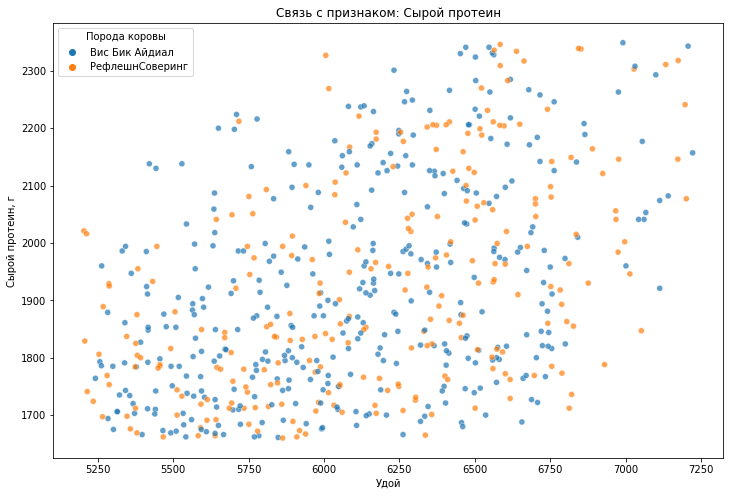

In [284]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(
    x = 'milk_yield',
    y = 'raw_protein',
    hue = 'breed',
    data = herd_info,
    alpha = 0.7,
    legend = True,
)
plt.title('Связь с признаком: Сырой протеин')
plt.legend(title = 'Порода коровы')
plt.ylabel('Сырой протеин, г')
plt.xlabel('Удой');

Количественный признак - энергетическая кормовая единица, цвет точек - Тип пастбища;

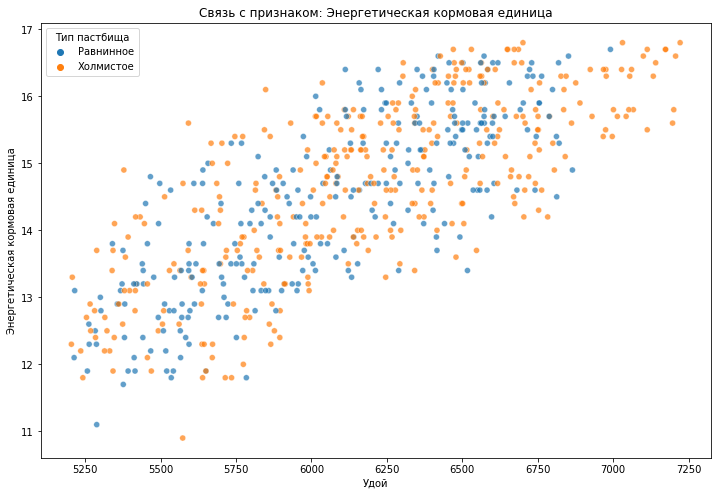

In [285]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(
    x = 'milk_yield',
    y = 'energy_feed_unit',
    hue = 'type_of_pasture',
    data = herd_info,
    alpha = 0.7,
    legend = True,
)
plt.title('Связь с признаком: Энергетическая кормовая единица')
plt.legend(title = 'Тип пастбища')
plt.ylabel('Энергетическая кормовая единица')
plt.xlabel('Удой');

Количественный признак - Сахаро-протеиновое соотношение, цвет точек - Порода папы быка;

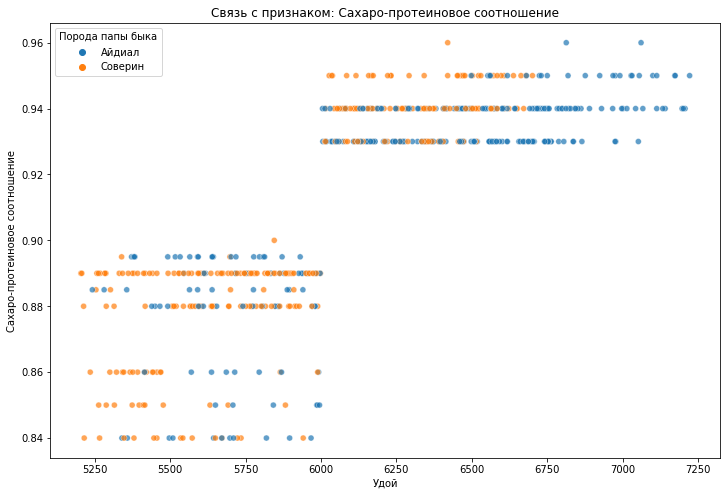

In [286]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(
    x = 'milk_yield',
    y = 'sugar_protein_ratio',
    hue = 'breed_of_papa_bull',
    data = herd_info,
    alpha = 0.7,
    legend = True,
)
plt.title('Связь с признаком: Сахаро-протеиновое соотношение')
plt.legend(title = 'Порода папы быка')
plt.ylabel('Сахаро-протеиновое соотношение')
plt.xlabel('Удой');

Количественный признак - Жирность, цвет точек - Вкус молока;

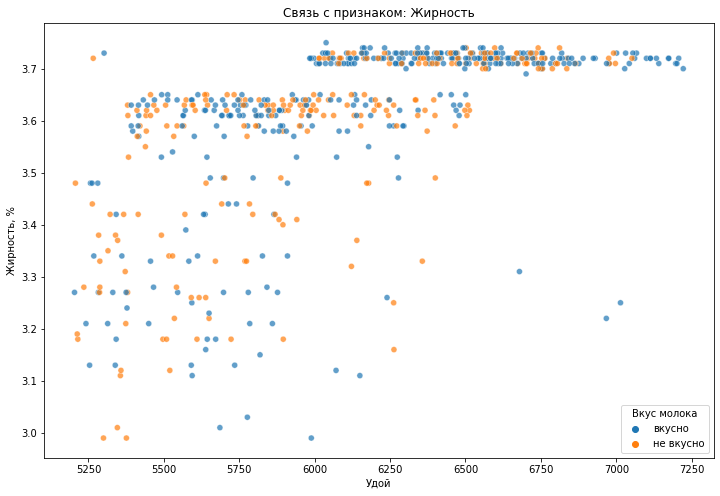

In [287]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(
    x = 'milk_yield',
    y = 'fat_content',
    hue = 'teste_of_milk',
    data = herd_info,
    alpha = 0.7,
    legend = True,
)
plt.title('Связь с признаком: Жирность')
plt.legend(title = 'Вкус молока')
plt.ylabel('Жирность, %')
plt.xlabel('Удой');

Количественный признак - Белок, цвет точек - Возраст;

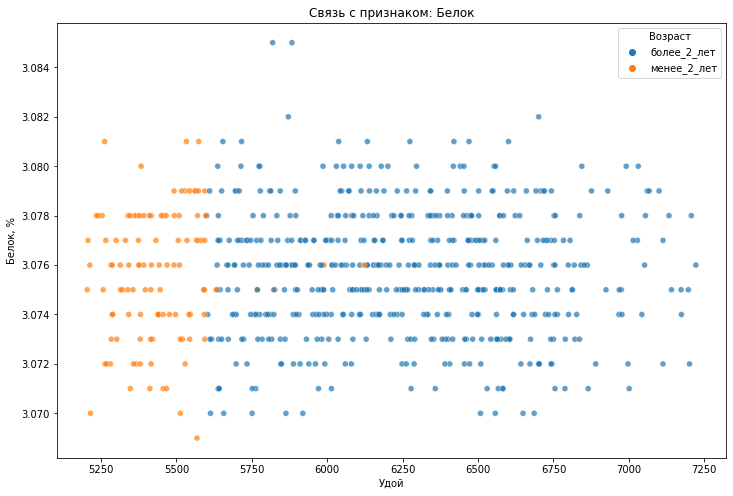

In [288]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(
    x = 'milk_yield',
    y = 'protein',
    hue = 'age',
    data = herd_info,
    alpha = 0.7,
    legend = True,
)
plt.title('Связь с признаком: Белок')
plt.legend(title = 'Возраст')
plt.ylabel('Белок, %')
plt.xlabel('Удой');

**Вывод**

**Целевой признак**

- Высокая взаимосвязь - Энергетическая кормовая единица; Сахаро-протеиновое соотношение. Это говорит о том, что присутствует мультиколлинеарность, что может плохо сказаться на работе модели
- Средняя связь наблюдается с признаком - Жирность
- Низкая связь - Сырой протеин
- Связь отсутствует - id, Белок

Нелинейность при высоком значении корреляции наблюдается с признаком: СПО; при среднем значении корреляции: Жирность. 

**Входные признаки**

Энергетическая кормовая единица
- Высокая связь: Удой, Сахаро-протеиновое соотношение. Также наблюдается мультиколлинеарность.
- Средняя связь: Жирность
- Низкая: Сырой протеин
- Отсутствует: идентификатор, Белок

Сырой протеин имеет среднюю связь почти со всеми признаками, кроме идентификатора, где связь отсутсвует.

Сахаро-протеиновое соотношение наоборот имеет высокую взаимосвязь с несколькими признаками: Удой, ЭКЕ и Жирность. Присутствует мультиколлинеарность.

Жирность
- Высокая связь - СПО
- Средняя - Удой, ЭКЕ

Белок - связь отсутствует со всеми признаками.

## Обучение модели линейной регрессии

### Первая модель 

Возьмем следующие количественные признаки - ЭКЕ, Жирность, СПО и Сырой протеин, т.к. у данных признакво прослеживается связь с целевым признаком. Также на количество удоя может влиять порода коровы и её возраст, поэтому из категориальных признаков возьмем Порода и Возраст. 

In [289]:
herd_new = herd_info[['milk_yield', 'energy_feed_unit', 'sugar_protein_ratio', 'breed_of_papa_bull',\
                      'breed', 'age']]
herd_new.head()

,milk_yield,energy_feed_unit,sugar_protein_ratio,breed_of_papa_bull,breed,age
0,5863,14.2,0.890,Айдиал,Вис Бик Айдиал,более_2_лет
1,5529,12.8,0.890,Соверин,Вис Бик Айдиал,менее_2_лет
2,5810,14.0,0.885,Соверин,РефлешнСоверинг,более_2_лет
3,5895,12.4,0.885,Айдиал,РефлешнСоверинг,более_2_лет
4,5302,12.8,0.885,Соверин,Вис Бик Айдиал,менее_2_лет


#### Разбиение на выборки

In [290]:
RANDOM_STATE = 42

X = herd_new.drop('milk_yield', axis = 1) #отделение входных признаков
y = herd_new['milk_yield'] #целевой признак

#разделение на выборки

X_train, X_test, y_train1, y_test1 = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE)

kat_prizn = ['breed_of_papa_bull', 'breed', 'age']
kol_prizn = ['energy_feed_unit', 'sugar_protein_ratio']

In [291]:
print(X_train.shape)
print(X_test.shape)

(471, 5)
(157, 5)


#### Кодирование категориальных признаков

In [292]:
#кодирование категориальных признаков

encoder = OneHotEncoder(drop = 'first', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[kat_prizn])
X_test_ohe = encoder.transform(X_test[kat_prizn])

#### Масштабирование количественных признаков

In [293]:
#масштабирование количесвенных признаков

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[kol_prizn])
X_test_scaled = scaler.transform(X_test[kol_prizn])
X_test_scaled

array([[-0.48639316, -1.01181832],
       [ 1.42588713,  0.83712999],
       [-0.48639316, -1.62813442],
       [-0.94534043, -1.01181832],
       [ 0.5844838 , -0.70366026],
       [-0.1039371 ,  0.52897194],
       [ 0.50799259,  0.83712999],
       [-0.1039371 ,  0.52897194],
       [ 1.50237834,  1.14528804],
       [-0.56288437, -2.24445052],
       [ 1.04343107,  0.83712999],
       [ 0.89044865,  0.83712999],
       [-0.86884922, -0.54958124],
       [ 1.27290471,  0.52897194],
       [ 0.89044865,  0.83712999],
       [ 0.12553653, -0.54958124],
       [-0.40990195, -0.85773929],
       [ 0.89044865,  0.83712999],
       [ 1.27290471,  0.83712999],
       [ 1.50237834,  1.14528804],
       [-0.48639316,  0.83712999],
       [-0.33341074, -0.70366026],
       [-0.86884922, -0.54958124],
       [-1.25130528, -1.01181832],
       [-0.1039371 , -0.70366026],
       [ 0.81395744,  0.83712999],
       [-0.1039371 ,  0.52897194],
       [-0.48639316, -0.70366026],
       [ 0.66097501,

#### Cоздание нового датафрейма из закодированных и отмасштабированных данных

In [294]:
#получаем список новых закодированных столбцов
encoder_names = encoder.get_feature_names()

#создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = kol_prizn)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = kol_prizn)

#обьединим датафреймы в один и сбросим индексы
X_train1 = pd.concat([X_train_ohe, X_train_scaled], axis = 1)
X_test1 = pd.concat([X_test_ohe, X_test_scaled], axis = 1)

X_train1.head()

,x0_Соверин,x1_РефлешнСоверинг,x2_менее_2_лет,energy_feed_unit,sugar_protein_ratio
0,1.0,1.0,0.0,1.502378,0.837130
1,1.0,1.0,1.0,-1.557270,-0.703660
2,0.0,0.0,0.0,0.125537,-1.011818
3,0.0,0.0,0.0,-0.103937,0.837130
4,0.0,0.0,0.0,-1.098323,-0.703660


#### Обучение модели линейной регрессии на подготовленных данных

In [295]:
lr1 = LinearRegression()

lr1.fit(X_train1, y_train1)

predictions1 = lr1.predict(X_test1)

r2 = r2_score(y_test1, predictions1)
print(f'Кэффициент детерминации: {r2:.2f}')

Кэффициент детерминации: 0.78


#### Анализ остатков

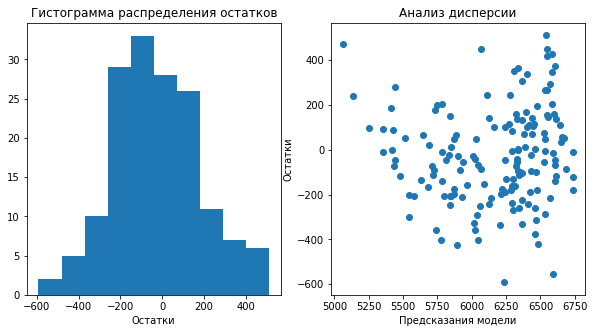

In [296]:
residuals = y_test1 - predictions1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(
    x = predictions1,
    y = residuals
)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Точность предсказания модели оценивается в 78%, это значит, что в остальных 22% она делает ошибочные выводы. 

На гистограмме распределения остатков данные имеют нормальне распределение от -400 до 0, после 0 наблюдается отдельный пик на значении 600. Но пик значений находится слева 0, что говорит о том, модель часто даёт слишком большие предсказания, её прогнозы больше истинных значений.

На диаграмме общая картина напоминает "Дугу", большой разброс значений наблюдается в промежутке от 5000 до 5750. Можно предположить, что модель хуже предсказывает значения удоя до 6000 кг.

Чтобы исправить ситуацию стоит добавить дополнительные признаки или изменить некоторые признаки.

### Вторая модель

Для улучшения работы модели можно перевести признак СПО в категориальный бинарный признак и перевести значения ЭКЕ в ЭКЕ в кв.

In [297]:
herd_new['sugar_protein_ratio'].value_counts()

0.940    172
0.930    140
0.890     94
0.880     58
0.950     55
0.840     25
0.860     25
0.895     23
0.850     17
0.885     15
0.960      3
0.900      1
Name: sugar_protein_ratio, dtype: int64

Можно разделить значения на 2 категории СПО: 
- нормальное: 0.8-0.9
- высокое: 0.9-1.

In [298]:
herd_new['sugar_protein_ratio'] = herd_new['sugar_protein_ratio'].apply(lambda x: 'нормальное' if x < 0.9 else 'высокое')
herd_new['sugar_protein_ratio'].value_counts()

/tmp/ipykernel_48/52795477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  herd_new['sugar_protein_ratio'] = herd_new['sugar_protein_ratio'].apply(lambda x: 'нормальное' if x < 0.9 else 'высокое')


высокое       371
нормальное    257
Name: sugar_protein_ratio, dtype: int64

In [299]:
herd_new['energy_feed_unit'] = herd_new['energy_feed_unit'] * herd_new['energy_feed_unit']
herd_new['energy_feed_unit'].head()

/tmp/ipykernel_48/1092916700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  herd_new['energy_feed_unit'] = herd_new['energy_feed_unit'] * herd_new['energy_feed_unit']


0    201.64
1    163.84
2    196.00
3    153.76
4    163.84
Name: energy_feed_unit, dtype: float64

In [300]:
herd_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   milk_yield           628 non-null    int64  
 1   energy_feed_unit     628 non-null    float64
 2   sugar_protein_ratio  628 non-null    object 
 3   breed_of_papa_bull   628 non-null    object 
 4   breed                628 non-null    object 
 5   age                  628 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 50.5+ KB


#### Повторное обучение модели на новых данных

In [301]:
#отделение признаков
X = herd_new.drop('milk_yield', axis = 1)
y = herd_new['milk_yield']

#разбиение на выборки
X_train_new, X_test_new, y_train2, y_test2 = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE
)

num_pr = ['energy_feed_unit']
kat_pr = ['breed_of_papa_bull', 'breed', 'age', 'sugar_protein_ratio']

#кодирование категориальных признаков
X_train_new_ohe = encoder.fit_transform(X_train_new[kat_pr])
X_test_new_ohe = encoder.transform(X_test_new[kat_pr])

#масштабирование количественных признаков
X_train_new_scaler = scaler.fit_transform(X_train_new[num_pr])
X_test_new_scaler = scaler.transform(X_test_new[num_pr])

#создание датафреймов обработанных данных
encoder_names = encoder.get_feature_names()

X_train_new_ohe = pd.DataFrame(X_train_new_ohe, columns = encoder_names)
X_test_new_ohe = pd.DataFrame(X_test_new_ohe, columns = encoder_names)

X_train_new_scaler = pd.DataFrame(X_train_new_scaler, columns = num_pr)
X_test_new_scaler = pd.DataFrame(X_test_new_scaler, columns = num_pr)

X_train2 = pd.concat([X_train_new_ohe, X_train_new_scaler], axis = 1)
X_test2 = pd.concat([X_test_new_ohe, X_test_new_scaler], axis = 1)

#Обучение модели линейной регрессии
lr2 = LinearRegression()

lr2.fit(X_train2, y_train2)
predictions2 = lr2.predict(X_test2)

#### R2 новой модели

In [302]:
r2 = r2_score(y_test2, predictions2)
print(f'Кэффициент детерминации: {r2:.2f}')

Кэффициент детерминации: 0.81


#### Анализ остатков

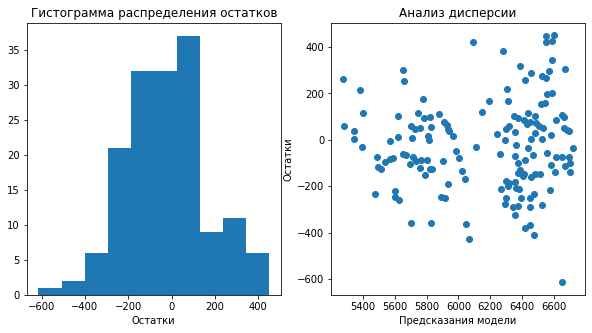

In [303]:
residuals = y_test2 - predictions2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(
    x = predictions2,
    y = residuals
)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Точность предсказания выросла с 78% до 81%

После изменения признаков с сильным влиянием на целевой, картина на гистограмме и диаграмме почти не изменилась, кроме смещения пика значений - теперь он находится справа от 0, т.е. модель недооценивает реальные значения целевого признака, её прогнозы меньше фактических показателей. Осталось попробовать вариант с добавлением дополнительного признака в модель.

### Третья модель

К датасету **herd_info** присоединим **dad_name_info** по id для добавления нового признака "Имя папы". Далее также отберем признаки, имеющие связь с целевым, опираясь не только на наличие линейной связи, но и на фактическую. 

In [304]:
herd_new['id'] = herd_info['id']
herd = herd_new.merge(dad_name_info, on = 'id', how = 'inner')
herd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   milk_yield           628 non-null    int64  
 1   energy_feed_unit     628 non-null    float64
 2   sugar_protein_ratio  628 non-null    object 
 3   breed_of_papa_bull   628 non-null    object 
 4   breed                628 non-null    object 
 5   age                  628 non-null    object 
 6   id                   628 non-null    int64  
 7   dad_name             628 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 44.2+ KB


/tmp/ipykernel_48/268085612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  herd_new['id'] = herd_info['id']


In [305]:
herd = herd[['milk_yield', 'energy_feed_unit', 'sugar_protein_ratio', 'breed', 'age', 'breed_of_papa_bull', 'dad_name']]

#### Разделение на выборки

In [306]:
X = herd.drop('milk_yield', axis = 1)
y = herd['milk_yield']

X_train, X_test, y_train3, y_test3 = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE
)

num_col = ['energy_feed_unit']
cat_col = ['sugar_protein_ratio', 'breed', 'age', 'breed_of_papa_bull', 'dad_name']

#кодирование
X_train_ohe = encoder.fit_transform(X_train[cat_col])
X_test_ohe = encoder.transform(X_test[cat_col])

#масштабирование
X_train_scaler = scaler.fit_transform(X_train[num_col])
X_test_scaler = scaler.transform(X_test[num_col])

#датафреймы с закодированными и отмасштабированными признаками
column_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns = column_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = column_names)

X_train_scaler = pd.DataFrame(X_train_scaler, columns = num_col)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = num_col)

X_train3 = pd.concat([X_train_ohe, X_train_scaler], axis = 1)
X_test3 = pd.concat([X_test_ohe, X_test_scaler], axis = 1)
X_train3.head()

,x0_нормальное,x1_РефлешнСоверинг,x2_менее_2_лет,x3_Соверин,x4_Буйный,x4_Геркулес,x4_Соловчик,energy_feed_unit
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.577968
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.511438
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.082269
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.150235
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.102358


#### R2 третьей модели

In [307]:
lr3 = LinearRegression()

lr3.fit(X_train3, y_train3)
predictions3 = lr3.predict(X_test3)

r2 = r2_score(y_test3, predictions3)
print(f'Кэффициент детерминации: {r2:.2f}')

Кэффициент детерминации: 0.82


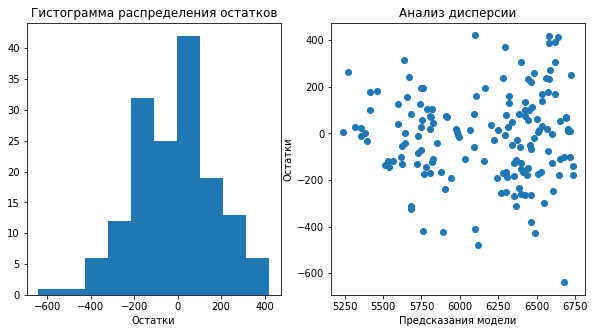

In [308]:
residuals = y_test3 - predictions3

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(
    x = predictions3,
    y = residuals
)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

График стал более симметричным и без смещения пика значений, что говорит о том, что среднее значение остатков модели равно 0.

"Дуга" стала прослеживаться на диаграмме менее явно, распределение точек больше похоже на нормальное. Модель стала ошибаться более равномерно.

### Сравнение качества трех моделей

#### Метрика MSE

In [309]:
print('Среднеквадратичная ошибка')
print(f'Первая модель: {mean_squared_error(y_test1, predictions1):.2f}')
print(f'Вторая модель: {mean_squared_error(y_test2, predictions2):.2f}')
print(f'Третья модель: {mean_squared_error(y_test3, predictions3):.2f}')

Среднеквадратичная ошибка
Первая модель: 45445.17
Вторая модель: 37832.29
Третья модель: 36668.66


Чем меньше значение данной метрики, тем лучше модель педсказывает целевое значение. В данном случае лучше всего себя показала третья модель. Но эта метрика не устойчива к выбросам, поэтому рано делать выводы.

#### Метрика MAE

In [310]:
print('Средняя абсолютная ошибка')
print(f'Первая модель: {mean_absolute_error(y_test1, predictions1):.2f}')
print(f'Вторая модель: {mean_absolute_error(y_test2, predictions2):.2f}')
print(f'Третья модель: {mean_absolute_error(y_test3, predictions3):.2f}')

Средняя абсолютная ошибка
Первая модель: 171.09
Вторая модель: 154.14
Третья модель: 149.10


В данном случае принцип тот же - чем меньше значение МАЕ, тем лучше работает модель. Самое низкое значение имеет третья модель.

#### Метрика RMSE

In [311]:
print('Корень среднеквадратичной ошибки')
print(f'Первая модель: {mean_squared_error(y_test1, predictions1, squared = False):.2f}')
print(f'Вторая модель: {mean_squared_error(y_test2, predictions2, squared = False):.2f}')
print(f'Третья модель: {mean_squared_error(y_test3, predictions3, squared = False):.2f}')

Корень среднеквадратичной ошибки
Первая модель: 213.18
Вторая модель: 194.51
Третья модель: 191.49


По итогам сравнения показателей трех метрик лучше всех себя показала третья модель - она имеет самые низкие показатели, что говорит о том, что она лучше предсказывает целевой признак и ошибается на 191.49 кг при диапазоне значений от 5000 кг. 

#### Доверительный интервал лучшей модели

In [312]:
print(f'Доверительный интервал прогноза третьей модели: {np.quantile(predictions3, 0.025), np.quantile(predictions3, 0.975)}')

Доверительный интервал прогноза третьей модели: (5355.997220074516, 6721.015188854443)


Модель прогнозирует удой от 5355 до 6721 кг.

### Прогноз удоя коров

Для прогнозирования будем использовать датафрейм cow_info. При подготовке данных сделаем следующее:
 1. Переведем СПО в бинарный признак - разделим значения на 2 категории
    - нормальное: 0.8 - 0.9
    - высокое: 0.9 - 1
 2. ЭКЕ возведем в квадрат
 3. Уберем признаки, которые не влияют на количество Удоя фактически.
 3. Закодируем категориальные признаки
 4. Масштабируем количественные признаки

#### Подготовка данных

In [313]:
cow_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   breed                20 non-null     object 
 1   type_of_pasture      20 non-null     object 
 2   breed_of_papa_bull   20 non-null     object 
 3   dad_name             20 non-null     object 
 4   fat_content          20 non-null     float64
 5   protein              20 non-null     float64
 6   age                  20 non-null     object 
 7   energy_feed_unit     20 non-null     float64
 8   raw_protein          20 non-null     float64
 9   sugar_protein_ratio  20 non-null     float64
dtypes: float64(5), object(5)
memory usage: 1.7+ KB


In [314]:
cow_info['sugar_protein_ratio'] = cow_info['sugar_protein_ratio'].apply(lambda x: 'нормальное' if x < 0.9 else 'высокое')
cow_info['sugar_protein_ratio'].value_counts()

высокое    20
Name: sugar_protein_ratio, dtype: int64

In [315]:
cow_info['energy_feed_unit'] = round(cow_info['energy_feed_unit'] * cow_info['energy_feed_unit'], 2)
cow_info['energy_feed_unit'].head()

0    222.31
1    180.63
2    216.09
3    169.52
4    180.63
Name: energy_feed_unit, dtype: float64

In [316]:
cow = cow_info[['energy_feed_unit', 'sugar_protein_ratio', 'breed', 'age', 'breed_of_papa_bull', 'dad_name']]
cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   energy_feed_unit     20 non-null     float64
 1   sugar_protein_ratio  20 non-null     object 
 2   breed                20 non-null     object 
 3   age                  20 non-null     object 
 4   breed_of_papa_bull   20 non-null     object 
 5   dad_name             20 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.1+ KB


In [317]:
num = ['energy_feed_unit']
cat = ['sugar_protein_ratio', 'breed', 'age', 'breed_of_papa_bull', 'dad_name']

cow_encoder = encoder.transform(cow[cat])
cow_scaler = scaler.transform(cow[num])

column_names = encoder.get_feature_names()

cow_encoder = pd.DataFrame(cow_encoder, columns = column_names)
cow_scaler = pd.DataFrame(cow_scaler, columns = num)

cow = pd.concat([cow_encoder, cow_scaler], axis = 1)
cow.head()

,x0_нормальное,x1_РефлешнСоверинг,x2_менее_2_лет,x3_Соверин,x4_Буйный,x4_Геркулес,x4_Соловчик,energy_feed_unit
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.247925
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,-0.862130
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.082269
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.158020
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.862130


In [318]:
prediction = lr3.predict(cow)
prediction

array([6507.3920499 , 6132.77346822, 6229.40257775, 6268.89798145,
       6319.85315399, 6154.3546482 , 6368.83617568, 6597.862237  ,
       6257.9301361 , 6198.47101262, 6202.87052343, 6916.3226536 ,
       6686.99642045, 6081.5442815 , 6532.79453669, 6721.9449611 ,
       6273.40972719, 6116.28732757, 6751.59917523, 6525.41668536])

По предсказанию 3 модели условию - Удой более 6000 кг/год удовлетворяют все 16 коров.

In [319]:
cow_info['milk_yield'] = prediction
cow_info['milk_yield'] = round(cow_info['milk_yield'], 2)
cow_info.head()

,breed,type_of_pasture,breed_of_papa_bull,dad_name,fat_content,protein,age,energy_feed_unit,raw_protein,sugar_protein_ratio,milk_yield
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,222.31,1830.15,высокое,6507.39
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,180.63,2244.90,высокое,6132.77
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,216.09,1946.70,высокое,6229.40
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,169.52,2112.60,высокое,6268.90
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,180.63,1758.75,высокое,6319.85


In [320]:
cow_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   breed                20 non-null     object 
 1   type_of_pasture      20 non-null     object 
 2   breed_of_papa_bull   20 non-null     object 
 3   dad_name             20 non-null     object 
 4   fat_content          20 non-null     float64
 5   protein              20 non-null     float64
 6   age                  20 non-null     object 
 7   energy_feed_unit     20 non-null     float64
 8   raw_protein          20 non-null     float64
 9   sugar_protein_ratio  20 non-null     object 
 10  milk_yield           20 non-null     float64
dtypes: float64(5), object(6)
memory usage: 1.8+ KB


## Обучение модели логистической регрессии

### Подготовка данных

Целевой признак **teste_of_milk** - вкус молока. Фактически на вкус молока влияет корм, т.е. содержащиеся в нем компоненты - Сырой протеин и СПО, также Жирность и содержание Белка в самом молоке. Исключим из выборки такие признаки как id, milk_yield, age, protein, breed_of_papa_bull, breed.

In [321]:
herd_new = herd_info[['teste_of_milk', 'energy_feed_unit', 'raw_protein', 'sugar_protein_ratio']]

In [322]:
herd_new['teste_of_milk'] = herd_new['teste_of_milk'].apply(lambda x: 0 if x == 'вкусно' else 1)
herd_new['energy_feed_unit'] = round(herd_new['energy_feed_unit'] * herd_new['energy_feed_unit'], 2)
herd_new['sugar_protein_ratio'] = herd_new['sugar_protein_ratio'].apply(lambda x: 'нормальное' if x < 0.9 else 'высокое')

/tmp/ipykernel_48/3841727008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  herd_new['teste_of_milk'] = herd_new['teste_of_milk'].apply(lambda x: 0 if x == 'вкусно' else 1)
/tmp/ipykernel_48/3841727008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  herd_new['energy_feed_unit'] = round(herd_new['energy_feed_unit'] * herd_new['energy_feed_unit'], 2)
/tmp/ipykernel_48/3841727008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [323]:
herd_new.head()

,teste_of_milk,energy_feed_unit,raw_protein,sugar_protein_ratio
0,0,201.64,1743,нормальное
1,0,163.84,2138,нормальное
2,1,196.00,1854,нормальное
3,1,153.76,2012,нормальное
4,0,163.84,1675,нормальное


In [324]:
X = herd_new.drop('teste_of_milk', axis = 1)
y = herd_new['teste_of_milk']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE
)

num = ['energy_feed_unit', 'raw_protein']
cat = ['sugar_protein_ratio']

X_train_ohe = encoder.fit_transform(X_train[cat])
X_test_ohe = encoder.transform(X_test[cat])

X_train_scaler = scaler.fit_transform(X_train[num])
X_test_scaler = scaler.transform(X_test[num])

column_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns = column_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = column_names)

X_train_scaler = pd.DataFrame(X_train_scaler, columns = num)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = num)

X_train_log = pd.concat([X_train_ohe, X_train_scaler], axis = 1)
X_test_log = pd.concat([X_test_ohe, X_test_scaler], axis = 1)
X_train_log.head()

,x0_нормальное,energy_feed_unit,raw_protein
0,0.0,1.577968,1.079523
1,1.0,-1.511438,-0.196920
2,1.0,0.082269,-1.386085
3,0.0,-0.150235,0.752230
4,1.0,-1.102358,0.828598


In [325]:
print(X_train_log.shape)
print(X_test_log.shape)

(471, 3)
(157, 3)


### Обучение модели логической регрессии

In [326]:
clf = LogisticRegression(random_state = RANDOM_STATE)

clf.fit(X_train_log, y_train)
pred = clf.predict(X_test_log)
clf.coef_

array([[-0.64842191, -0.61622452, -0.21962165]])

Чтобы оценить влияние каждого входного признака на целевой, выведем коэффициенты обученной модели:

In [327]:
for feature_number, feature_name in enumerate(X_train_log.columns):
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}") 

x0_нормальное       : -0.648422
energy_feed_unit    : -0.616225
raw_protein         : -0.219622


Больше всего на целевой признак влияют такие признаки как СПО и ЭКЕ.

### Оценка качества модели с помощью метрик

#### Метрика accuracy

In [328]:
round(accuracy_score(pred, y_test), 2)

0.64

Доля верных ответов составляет 64%, в то время модель ошибается в 24% случаев.

#### Метрика recall

In [329]:
round(recall_score(y_test, pred, pos_label = 0), 2)

0.85

Данная метрика не учитывает ошибку 1 рода - когда вкусное молоко выдают за не вкусное. По её показателям модель присваивает метку 1 верно в 85% случаев.

#### Метрика precision

In [330]:
round(precision_score(y_test, pred, pos_label = 0), 2)

0.64

Модель присваивает класс "вкусно" верно в 64% случаях, но ошибается в 24% случаев. Но в этом случае не учитываются ошибки второго рода - не вкусное молоко оказывается вкусным.

### Построение матрицы ошибок

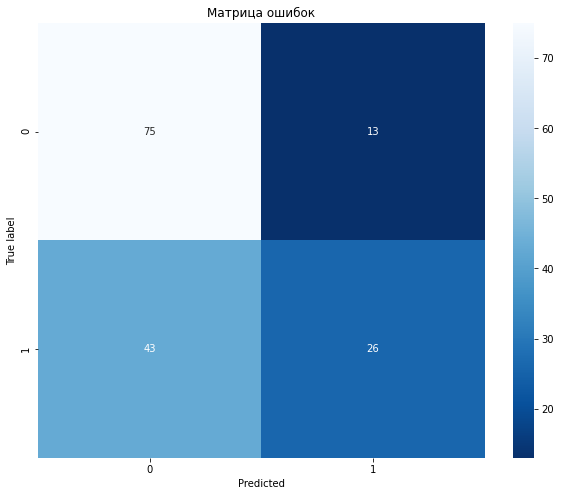

In [331]:
fig, ax = plt.subplots(figsize = (10, 8))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок')
plt.ylabel('True label')
plt.xlabel('Predicted');

Ошибка 1го рода - модель предсказала, что молоко вкусное, но оно оказалось не внусным

Ошибка 2го рода - модель предсказала, что молоко не вкусное, но оно оказалось вкусным

Можно предположить, что более критичной в этой ситуации является ошибка 1 рода, т.к. если молочное хозяйство будет поставлять изделия из такого молока, а потребителям не понравится вкус, то предприятие понесет больший убыток, чем в ситуации, когда вкусное молоко будет недопущено до производства.

Поэтому нужно сделать так, чтобы модель допускала меньше ошибок False Positive, которую она допускает в 13% случаев.

### Подбор порога

Выведем объекты принадлежащие к классу 0 - вкус_молока "вкусный"

In [332]:
proba = clf.predict_proba(X_test_log)[:,0]
data = pd.DataFrame(zip(y_test, proba),
                    columns = ['y_valid', 'proba']).sort_values(by='proba',ascending=False)
data.head()

,y_valid,proba
146,0,0.834291
85,0,0.823405
8,0,0.815261
114,0,0.814512
19,0,0.813995


Посмотрим на то, как модель будет работать при разных порогах. 

In [333]:
porog = [round(i,2) for i in np.linspace(0.1,1,num = 6,endpoint=False)]
porog

[0.1, 0.25, 0.4, 0.55, 0.7, 0.85]

In [334]:
columns = []

for i in porog:
    columns.append('pred_'+str(i))
    data['pred_'+str(i)] = data['proba'].apply(lambda x: 1 if x < i else 0)
data.sample(15)

,y_valid,proba,pred_0.1,pred_0.25,pred_0.4,pred_0.55,pred_0.7,pred_0.85
52,0,0.524551,0,0,0,1,1,1
86,0,0.781575,0,0,0,0,0,1
128,0,0.656539,0,0,0,0,1,1
109,0,0.551191,0,0,0,0,1,1
75,1,0.535792,0,0,0,1,1,1
147,0,0.752433,0,0,0,0,0,1
116,1,0.684518,0,0,0,0,1,1
64,0,0.668453,0,0,0,0,1,1
110,0,0.765886,0,0,0,0,0,1
139,0,0.643370,0,0,0,0,1,1


С предсказанием значения 0 или "вкусно" лучше справляется предсказание с порогом 0.78. Построим диаграмму для наглядного результата.

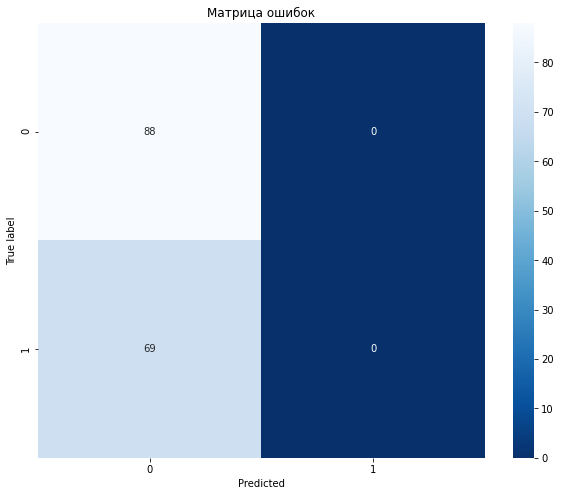

In [335]:
new_pred = (clf.predict_proba(X_test_log)[:,0] >= 0.85)
fig, ax = plt.subplots(figsize = (10, 8))
cm = confusion_matrix(y_test, new_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок')
plt.ylabel('True label')
plt.xlabel('Predicted');

Ошибок первой категории не осталось. Были подобраны следующие пороги:
1. 0.78 - число ошибок первой категории практически не сократилось 
2. 0.82 - осталось 2 ошибки
3. 0.85 - оптимальный порог - ошибок первой категории не осталось

Рассчитаем необходимые метрики.

### Оценка качества модели с помощью метрик

#### Метрика recall

In [336]:
round(recall_score(y_test, new_pred, pos_label = 0), 2)

1.0

#### Метрика precision

In [337]:
round(precision_score(y_test, new_pred, pos_label = 0), 2)

0.56

### Прогноз вкуса молока коров

#### Подготовка данных

In [338]:
cows = cow_info[['energy_feed_unit', 'raw_protein', 'sugar_protein_ratio']]
cows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   energy_feed_unit     20 non-null     float64
 1   raw_protein          20 non-null     float64
 2   sugar_protein_ratio  20 non-null     object 
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [339]:
#отделяем количественные признаки от категориальных

num = ['energy_feed_unit', 'raw_protein']
cat = ['sugar_protein_ratio']

#кодируем категориальные и масштабируем количесвенные признаки

cows_ohe = encoder.transform(cows[cat])
cows_scaler = scaler.transform(cows[num])

#получаем имена столбцов закодированных признаков

column_names = encoder.get_feature_names()

#обьединяем признаки в датафрейм

cows_ohe = pd.DataFrame(cows_ohe, columns = column_names)
cows_scaler = pd.DataFrame(cows_scaler, columns = num)

cows = pd.concat([cows_ohe, cows_scaler], axis = 1)
cows.head()

,x0_нормальное,energy_feed_unit,raw_protein
0,0.0,0.247925,-0.517940
1,0.0,-0.862130,1.744474
2,0.0,0.082269,0.117827
3,0.0,-1.158020,1.022792
4,0.0,-0.862130,-0.907419


#### Прогноз вкуса молока

In [340]:
teste_pred = (clf.predict(cows) >= 0.85)
pd.Series(teste_pred).value_counts()

False    13
True      7
dtype: int64

По результату предсказания 7 коров имеют вкусное молоко. Добавим предсказания в таблицу **cow_info** и приведем в нужный нам вид.

In [341]:
cow_info['teste_of_milk'] = teste_pred
cow_info['teste_of_milk'] = cow_info['teste_of_milk'].apply(lambda x: 'вкусно' if x == True else 'не вкусно')
cow_info.head()

,breed,type_of_pasture,breed_of_papa_bull,dad_name,fat_content,protein,age,energy_feed_unit,raw_protein,sugar_protein_ratio,milk_yield,teste_of_milk
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,222.31,1830.15,высокое,6507.39,не вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,180.63,2244.90,высокое,6132.77,не вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,216.09,1946.70,высокое,6229.40,не вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,169.52,2112.60,высокое,6268.90,вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,180.63,1758.75,высокое,6319.85,вкусно


In [342]:
cow_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   breed                20 non-null     object 
 1   type_of_pasture      20 non-null     object 
 2   breed_of_papa_bull   20 non-null     object 
 3   dad_name             20 non-null     object 
 4   fat_content          20 non-null     float64
 5   protein              20 non-null     float64
 6   age                  20 non-null     object 
 7   energy_feed_unit     20 non-null     float64
 8   raw_protein          20 non-null     float64
 9   sugar_protein_ratio  20 non-null     object 
 10  milk_yield           20 non-null     float64
 11  teste_of_milk        20 non-null     object 
dtypes: float64(5), object(7)
memory usage: 2.0+ KB


## Итоговые выводы

Добавьте прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер.

Отберите коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.

Коротко опишите результаты работы моделей для фермера.
- Сколько коров он может купить из стада на продажу с минимальным риском для себя? Почему?
- Какие ещё рекомендации можно ему дать?

Сделайте выводы о моделях линейной регрессии и логистической регрессии.
- Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?
- Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?
- Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?


### Отбор коров

Отберем коров, удовлетворяющих условия:

1. Средний удой за год - не менее 6000 кг/год
2. Молоко должно быть вкусным

In [343]:
cow_info_final = cow_info.query('milk_yield >= 6000 and teste_of_milk == "вкусно"')
cow_info_final

,breed,type_of_pasture,breed_of_papa_bull,dad_name,fat_content,protein,age,energy_feed_unit,raw_protein,sugar_protein_ratio,milk_yield,teste_of_milk
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,169.52,2112.60,высокое,6268.90,вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,180.63,1758.75,высокое,6319.85,вкусно
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,177.82,1896.30,высокое,6154.35,вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,192.10,1881.60,высокое,6368.84,вкусно
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,197.96,1880.55,высокое,6198.47,вкусно
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,206.93,1761.90,высокое,6202.87,вкусно
17,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,169.52,1966.65,высокое,6116.29,вкусно


По результатам работ моделей линейной и логической регрессии упомянутым выше условиям подходят 7 коров из 20 представленных. Фермеру рекомендуется приобрести именно эти экземпляры, т.к. нет риска получить средний удой меньше 6000 кг и молоко окажется не вкусным.

Также рекомендуется соблюдать условия кормления, т.е. придерживаться указанного содержания компонентов в корме.

### Общие выводы

Перед работой с данными было проведено их изучение и исправлены некоторые недочеты:
- Заголовки переведены в змеиный регистр
- Пропуски в таблицах не обнаружены
- Были найдены явные дубликаты в таблицах **herd_info** и **cow_info**. Первая таблица была очищена от дубликатов в количетсве - 5 записей, а вторая является данными для прогнозирования и удаление записей могло повлиять на точность предсказаний.
- Были исправлены неявные дубликаты
- При исследовании признаков выявлено следующее:
 - Сильное влияение на целевой признак имеют ЭКЕ и СПО, среднее Жирность. В данных признаках выбросы убирать не стоит.
    - Преобладающие категории
        - Порода: Вис Бик Айдиал
        - Пастбище: Холмистое
        - Вкус молока: Вкусное
        - Возраст коров: более 2 лет
        - Порода: Соверин
    - Выбросы обнаружены у
        - Удой - максимальное значение удоя более 45000 кг
        - Жирность
        - Белок
- Добавлены столбцы в таблицу **cow_info** с показателями СПО, ЭКЕ и Сырой протеин, увеличенными на 5%. После добавления образовался пропуск в одной из строк - был заполнен медианным значением.
- При корреляционном анализе был использован метод Спирмена, т.к. данные имеют ненормальное распределение и связаны с целевым признаком не линейно.

Была проведена подготовка данных к обучению на них модели линейной регрессии:
- Разделение входных признаков от целевого
- Разбиение на тренировочную и тестовую выборки
- Кодирование категориальных признаков
- Масштабирование количественных признаков
- Объединение подготовленных признаков в новый датафрейм
- Обучение модели и получение предсказания
- Анализ остатков

Для улучшения качества модели линейной регрессии для начала были отобраны входные признаки, влияющие на целевой:
- на количество удоя влияют следующие факторы:
    - ЭКЕ
    - СПО
    - Порода коровы
    - Возраст
    - Порода папы быка

**Первая модель показала свою эффективность на 78%.** 

Для улучшения СПО был переведен из количественного в категориальный признак:
- от 0.8 до 0.9 - нормальное
- от 0.9 до 1 - высокое

Также значения ЭКЕ были возведены в квадрат. После этого **коэффициент детерминации вырос до 81%, что говорит об улучшении работы модели.**

В данные для третьей модели был добавлен новый признак - "Имя папы быка". После этого **показатель вырос до 82%.**

После с помощью метрик выявлена лучшая модель - **третья**. Она дала следующие показатели:
- Среднеквадратичная ошибка 36668.66
- Средняя абсолютная ошибка 149.10
- Корень среднеквадратичной ошибки 191.49
- Доверительный интервал от 5355 до 6721 кг.

Что говорит о более точном предсказании целевого значения, лучшей работоспособности и меньшем количесвте ошибок по сравнению с предыдущими моделями. **По итогу её предсказания средний удой не менее 6000 кг наблюдается у всех 20 коров.**

Подготовка данных для линейной регрессии отличий не имеет. Целевой признак - Вкус молока - для него отобраны следующие входные:
- ЭКЕ
- Сырой протеин
- СПО

Большее влияние имеют ЭКЕ и СПО.

После обучения выявлен результат следующих метрик:
- accuracy 0.64
- recall 0.85
- precision 0.64

Что говорит о том, что модель верно предсказывает значения в 64% случаев, ошибку 2 рода правильно определяет в 85%, а первого рода также в 64%.

**Ошибка 1го рода** - модель предсказала, что молоко вкусное, но оно оказалось не внусным

**Ошибка 2го рода** - модель предсказала, что молоко не вкусное, но оно оказалось вкусным

Можно предположить, что **более критичной в этой ситуации является ошибка 1 рода**, т.к. если молочное хозяйство будет поставлять изделия из такого молока, а потребителям не понравится вкус, то предприятие понесет больший убыток, чем в ситуации, когда вкусное молоко будет недопущено до производства.

При рассмотрении матрицы ошибок выводы следующие: 
- Истинно правильных ответов 75
- Ошибок первого рода 13
- Ошибок второго рода 43
- Истинно ложных ответов 26

**После подбора оптимального порога в 0.85 вместо стандартного в 0.5 количество ошибок первого рода составляет 0, как и истинно ложных ответов. По прогнозам модели вкусное молоко только у 7 коров из 20.**